In [1]:
# import
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
import matplotlib.gridspec as gridspec
import matplotlib as plt
import csv

In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}

    return labels[class_code]

In [4]:
class_names_label = {'mountain': 3,
                    'street' : 5,
                    'glacier' : 2,
                    'buildings' : 0,
                    'sea' : 4,
                    'forest' : 1
                    }
def get_images(directory):
    """
        Load the data:
            - 14,034 images to train the network.
            - 10,000 images to evaluate how accurately the network learned to classify images.
    """
    TLabel = pd.read_csv('train_labels.csv')
    size = (150,150)
    images = []
    labels = []
    for file in os.listdir(directory):
        img_path = directory + "/" + file
        curr_img = cv2.imread(img_path)
        curr_img = cv2.resize(curr_img, size)
        images.append(curr_img)
        id = file.partition('.')[0]
        labels.append(class_names_label[TLabel.iloc[int(id)][1]])

    images, labels = shuffle(images, labels)     ### Shuffle the data !!!
    images = np.array(images, dtype = 'float32') ### Our images
    labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        

    return images, labels

In [5]:
class_names_labelR = {3:'mountain',
                    5:'street',
                    2:'glacier',
                    0:'buildings',
                    4:'sea',
                    1:'forest'
                    }
def write_csv_kaggle_sub(fname, ID, Y):
    # fname = file name
    # Y is a list/array with class entries
    # ID is the image ID
    tmp = [['ID', 'label']]
    # add ID numbers for each Y
    for (i,y) in enumerate(Y):
        tmp2 = [ID[i], class_names_labelR[np.argmax(y, axis=0)]]
        tmp.append(tmp2)
    # write CSV file
    with open(fname, 'w',newline='') as f:
        writer = csv.writer(f)
        writer.writerows(tmp)

In [6]:
def get_test_images(directory):
    size = (150,150)
    images = []
    img_id=[]
    for file in os.listdir(directory):
        img_path = directory + "/" + file
        curr_img = cv2.imread(img_path)
        curr_img = cv2.resize(curr_img, size)
        images.append(curr_img)
        tmp_id = file.partition('.')[0]
        img_id.append(tmp_id)

    images = np.array(images, dtype = 'float32') ### Our images
    img_id = np.array(img_id, dtype = 'int32')   ### From 0 to num_classes-1!


    return images, img_id

In [7]:

Images, Labels = get_images('./train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [8]:
np.where(Labels == 4)

(array([    8,    18,    21, ..., 10475, 10490, 10495], dtype=int64),)

In [9]:
Images = np.array(Images)/255.0

In [10]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (10500, 150, 150, 3)
Shape of Labels: (10500,)


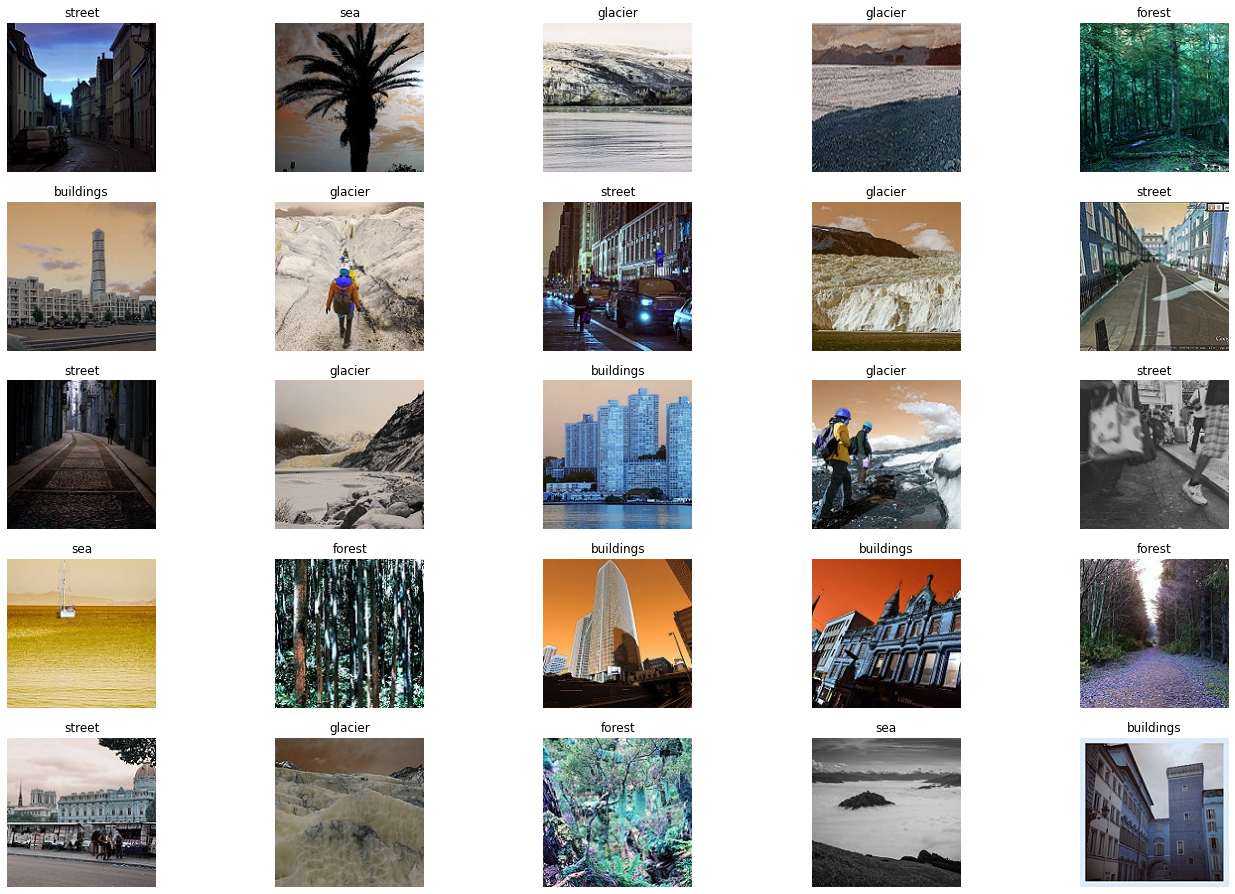

In [11]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')


In [12]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [13]:
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 100)       126100    
                                                        

C:\Users\chunc\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
trained = model.fit(Images,Labels,epochs=50,validation_split=0.30) #50epoch

Epoch 1/50
230/230 [==============================] - 57s 233ms/step - loss: 1.4135 - accuracy: 0.4179 - val_loss: 1.0693 - val_accuracy: 0.5665
Epoch 2/50
230/230 [==============================] - 46s 198ms/step - loss: 1.1640 - accuracy: 0.5394 - val_loss: 0.9827 - val_accuracy: 0.6109
Epoch 3/50
230/230 [==============================] - 38s 166ms/step - loss: 1.0749 - accuracy: 0.5688 - val_loss: 0.9182 - val_accuracy: 0.6166
Epoch 4/50
230/230 [==============================] - 39s 168ms/step - loss: 1.0036 - accuracy: 0.5931 - val_loss: 0.9170 - val_accuracy: 0.6392
Epoch 5/50
230/230 [==============================] - 39s 171ms/step - loss: 0.9370 - accuracy: 0.6231 - val_loss: 0.7718 - val_accuracy: 0.6826
Epoch 6/50
230/230 [==============================] - 41s 180ms/step - loss: 0.8574 - accuracy: 0.6746 - val_loss: 0.7596 - val_accuracy: 0.7071
Epoch 7/50
230/230 [==============================] - 39s 171ms/step - loss: 0.7803 - accuracy: 0.7200 - val_loss: 0.6122 - val_ac

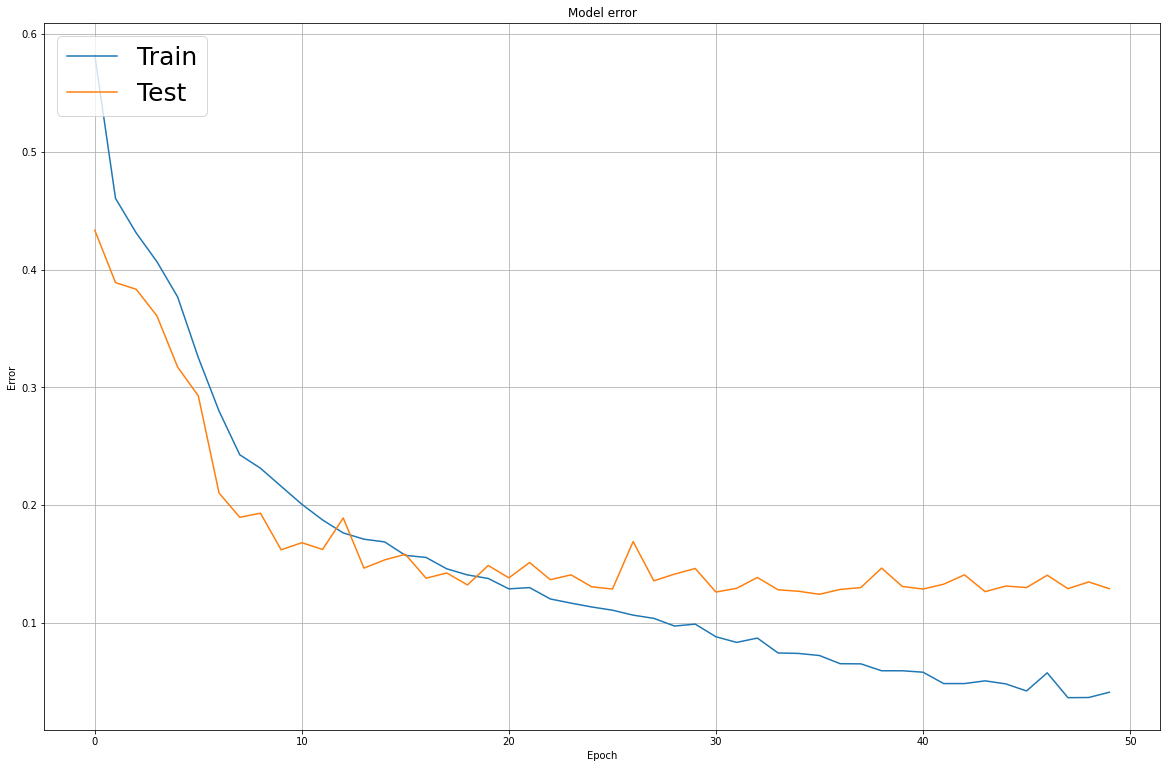

In [15]:
# plot.plot(trained.history['acc'])
# plot.plot(trained.history['val_acc'])
# plot.title('Model accuracy')
# plot.ylabel('Accuracy')
# plot.xlabel('Epoch')
# plot.legend(['Train', 'Test'], loc='upper left')
# plot.show()

plot.figure(figsize=(20,13))
plot.plot(np.ones(len(trained.history['accuracy']))-np.array(trained.history['accuracy']))
plot.plot(np.ones(len(trained.history['val_accuracy']))-np.array(trained.history['val_accuracy']))
plot.title('Model error')
plot.ylabel('Error')
plot.xlabel('Epoch')
plot.grid(True)
plot.legend(['Train', 'Test'], loc='upper left',prop = {'size':25})
# plot.savefig('CNNmodelerror.jpg') 
plot.show()


# plot.plot(trained.history['acc'])
# plot.plot(trained.history['val_acc'])
# plot.title('Model accuracy')
# plot.ylabel('Acc')
# plot.xlabel('Epoch')
# plot.legend(['Train', 'Test'], loc='upper left')
# plot.show()

In [16]:
test_images,test_labels = get_images('./test/') #45 epch  86  #50
test_images = np.array(test_images)/255.0
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

69/69 [==============================] - 5s 65ms/step - loss: 9.4196 - accuracy: 0.1382


[9.419571876525879, 0.13818182051181793]

In [17]:
# import zipfile
# zip_ref2 = zipfile.ZipFile('seg_pred.zip', 'r')
# zip_ref2.extractall()
# zip_ref2.close()

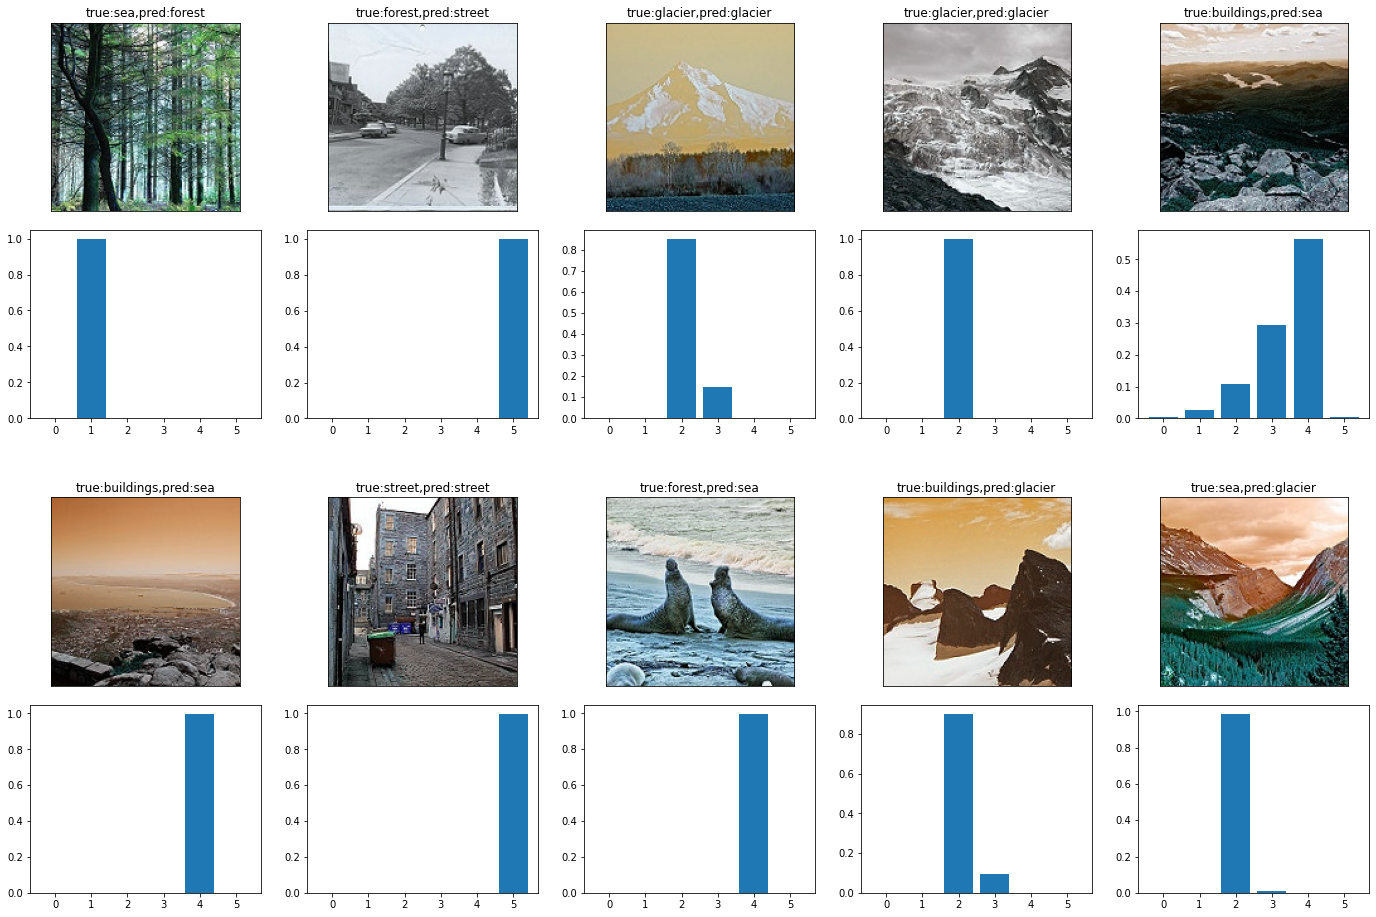

In [18]:
fig = plot.figure(figsize=(24, 16))
outer = gridspec.GridSpec(2, 5, wspace=0.2, hspace=0.2)

for i in range(10):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(test_images))
    test_image = np.array([test_images[rnd_number]])
    pre_labels = model.predict(test_image)
    pred_prob = pre_labels.reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(test_image[0])
            ax.set_title('true:{},pred:{}'.format(get_classlabel(test_labels[rnd_number]),get_classlabel(int(np.argmax(pre_labels, axis = 1)))))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


In [19]:
fig.savefig('cnnpreep.jpg')

In [20]:
test_images , img_id = get_test_images('./test/')

In [21]:
pre_labels = model.predict(test_images)

In [22]:
# Generate submission files
write_csv_kaggle_sub('result.csv', img_id, pre_labels)

In [23]:
pre_labels = np.argmax(pre_labels, axis = 1)

In [24]:
pre_labels

array([3, 2, 0, ..., 5, 0, 3], dtype=int64)

In [25]:
np.where(Labels==3)

(array([    4,    10,    30,    37,   130,   141,   159,   219,   223,
          246,   268,   280,   309,   329,   339,   361,   364,   386,
          390,   421,   444,   451,   525,   533,   537,   601,   610,
          624,   629,   636,   645,   652,   683,   690,   691,   699,
          756,   759,   766,   808,   811,   823,   825,   844,   878,
          883,   917,   958,   963,   966,   980,   985,   988,  1025,
         1052,  1064,  1068,  1078,  1093,  1123,  1158,  1162,  1186,
         1194,  1217,  1233,  1242,  1263,  1273,  1304,  1305,  1310,
         1317,  1366,  1393,  1394,  1396,  1441,  1452,  1475,  1497,
         1514,  1525,  1580,  1587,  1602,  1621,  1656,  1700,  1771,
         1801,  1824,  1827,  1828,  1842,  1884,  1962,  1971,  1972,
         2032,  2064,  2089,  2097,  2120,  2201,  2236,  2240,  2242,
         2252,  2285,  2287,  2303,  2308,  2312,  2314,  2324,  2350,
         2375,  2403,  2404,  2423,  2478,  2513,  2560,  2570,  2589,
      

In [26]:
len(Images), len(Labels),len(pre_labels)

(10500, 10500, 2200)

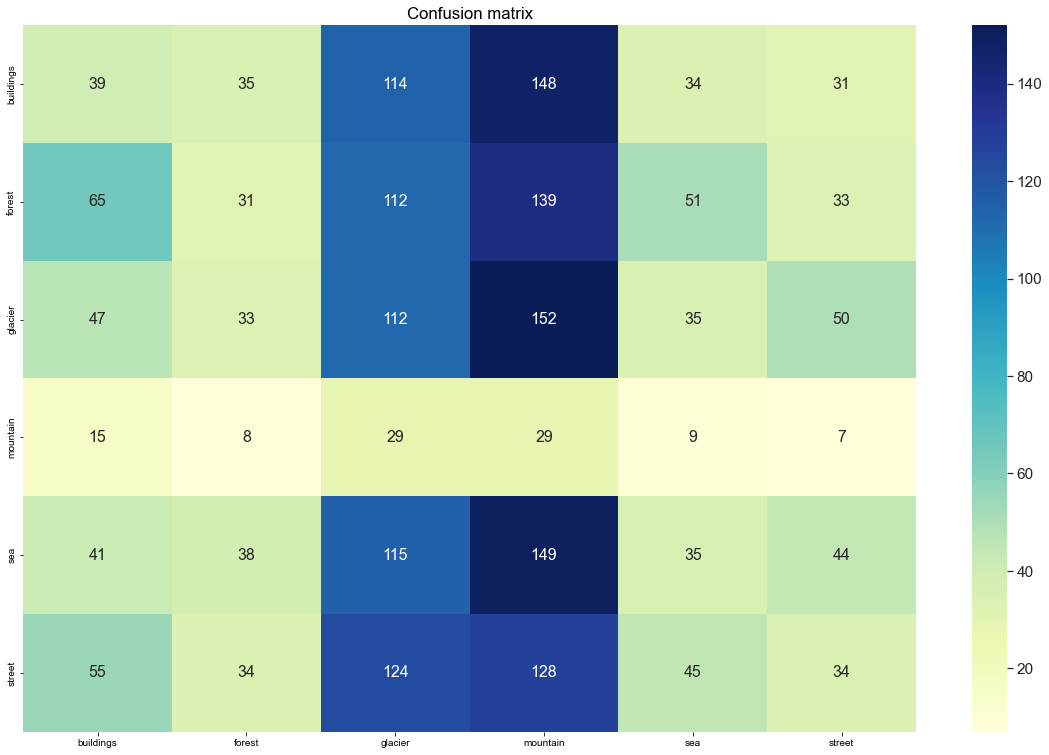

In [27]:
from sklearn.metrics import confusion_matrix# confusion matrix to carry out error analysis
import seaborn as sn 

class_names = ['buildings','forest', 'glacier','mountain', 'sea' ,'street' ]
CM = confusion_matrix(test_labels, pre_labels,labels=np.arange(6))
plot.figure(figsize=(20,13))
ax = plot.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=True,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion matrix')
plot.savefig('CNN_CM.jpg') # bbox_inches='tight'
plot.show()

In [28]:
plot.savefig('CNN_CM.jpg')

<Figure size 432x288 with 0 Axes>

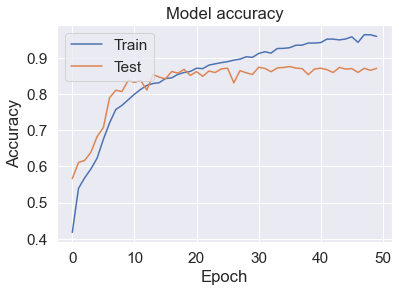

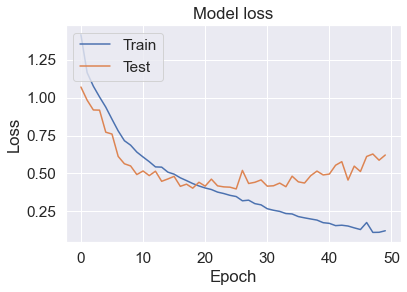

In [30]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()


In [32]:
# import shutil

# shutil.rmtree('./seg_train')

In [33]:
# shutil.rmtree('./seg_test')

In [34]:
# import zipfile
# zip_ref = zipfile.ZipFile('seg_train.zip', 'r')
# zip_ref.extractall()
# zip_ref.close()

In [35]:
# zip_ref1 = zipfile.ZipFile('seg_test.zip', 'r')
# zip_ref1.extractall()
# zip_ref1.close()

In [36]:
# zip_ref2 = zipfile.ZipFile('seg_pred.zip', 'r')
# zip_ref2.extractall()
# zip_ref2.close()

In [37]:
# Images.shape
# Labels.shape

##  RF

In [38]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators = 150)
# Images_rf = Images.reshape(Labels.shape[0],-1)
# rf.fit(Images_rf, Labels)

In [39]:
# index = np.random.randint(test_images.shape[0]) # We choose a random index

# img = test_images[index]
# img_flatten = img.reshape(1,-1)
# predictions = rf.predict(img_flatten)     # Vector of probabilities
# pred_img = np.argmax(predictions[0]) # We take the highest probability
# pred_label = class_names[predictions[pred_img]]
# true_label = class_names[test_labels[index]] 

In [40]:
# title = 'Pred : {} VS True : {}  '.format(pred_label , true_label )

# plt.figure()
# plt.imshow(test_images[index])
# plt.grid(False)
# plt.title(title)
# plt.show()

In [41]:
# def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
#     """
#         Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
#     """
#     BOO = (test_labels == pred_labels)
#     mislabeled_indices = np.where(BOO == 0)
#     mislabeled_images = test_images[mislabeled_indices]
#     mislabeled_labels = pred_labels[mislabeled_indices]
#     fig = plt.figure(figsize=(10,10))
#     fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
#     for i in range(25):
#         plt.subplot(5,5,i+1)
#         plt.xticks([])
#         plt.yticks([])
#         plt.grid(False)
#         plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
#         plt.xlabel(class_names[mislabeled_labels[i]])
#     plt.show()

In [42]:
# test_images_flatten = test_images.reshape(test_labels.shape[0],-1)
# predictions = rf.predict(test_images_flatten)
# predictions1 = rf.predict(Images.reshape(Labels.shape[0],-1))
# pred_labels = predictions
# # print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [43]:
# plot.figure(figsize=(20,13))
# CM = confusion_matrix(test_labels, pred_labels)
# ax = plot.axes()
# sn.set(font_scale=1.4)
# sn.heatmap(CM, annot=True,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax, fmt='d',cmap='YlGnBu')
# ax.set_title('Confusion matrix')
# plot.savefig('RF_CM.jpg') # bbox_inches='tight'
# plot.show()

In [44]:
# from sklearn.metrics import mean_squared_error
# print(f"MSE: {mean_squared_error(predictions,test_labels)}")
# print(f"MSE: {mean_squared_error(predictions1,Labels)}")

In [45]:
# rf.score(test_images_flatten,test_labels)

In [46]:
# rf.score(Images.reshape(Labels.shape[0],-1),predictions1)

In [47]:
# a = np.ones(len(trained.history['acc']))-np.array(trained.history['acc'])

In [48]:
# b = np.ones(len(trained.history['val_acc']))-np.array(trained.history['val_acc'])

In [49]:
# plot.plot(a)